<h1 align = 'center'>IN THE NAME OF GOD</h1>
<h3>CA#3: Aidin Kazemi</h3>
<hr>

In [33]:
#pip install keras statsmodels
import numpy as np, random,matplotlib.pyplot as plt, scipy.stats as sps,pandas as pd, math
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

<h3>Question 1</h3>

<h5>part 1)</h5>
<p>1) recommendation systems: most of streaming services use autoencoders to learn about your preferences based on what you've watched or listened to before. auto encoders tasks in this field are often Learning User and Item Representations, Encoding User Preferences, Capturing Item Features, Creating a Recommender Map, Generating Personalized Recommendations, Adapting to User Behavior, Enhancing User Experience and... which makes the auto encodres so important in this context.
</p>
<p>2) speech recognetion:  Autoencoders duty in this system is to recognize and process the unique patterns present in speech signals. from their tasks in this field we can mention Speech Signals Representation, Feature Extraction, Training on Diverse Speech Data, Adaptation to Individual Speech, Language Models Integration and Real-Time Processing. </p>

<h5>part 2)</h5>
<p>from many reasons that can lead to the blurriness of the output image, we can point out to:<br><br>
compression of information: 
 compressing the input data into a lower dimension latent may cause losing some fine details and leading to a smoother or blurrier output image
<br>

regularization techniques:
    autoencoders often use regularization techniques to prevent overfitting during training that can result in smoother representations, causing blur in the reconstructed image.
<br>

size of latent:
<br>
smaller latent space:
    a smaller latent space will capture more high-level features but may also discard some details. This can result to blur in the output image.
<br>
larger latent space:
    a larger latent space can capture more detailed information, leading to less blur in the reconstructed image. However, a very large latent space may also risk overfitting or capturing noise in the data.</p>

<h5>part 3)</h5>

<h5>A</h5>

In [34]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

<h5>B</h5>

In [35]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 1s 4ms/step


<h5>C</h5>
<p>we choose 1432:1436 as random numbers. as you can see the reconstructed images are blurrier than the original images</p>

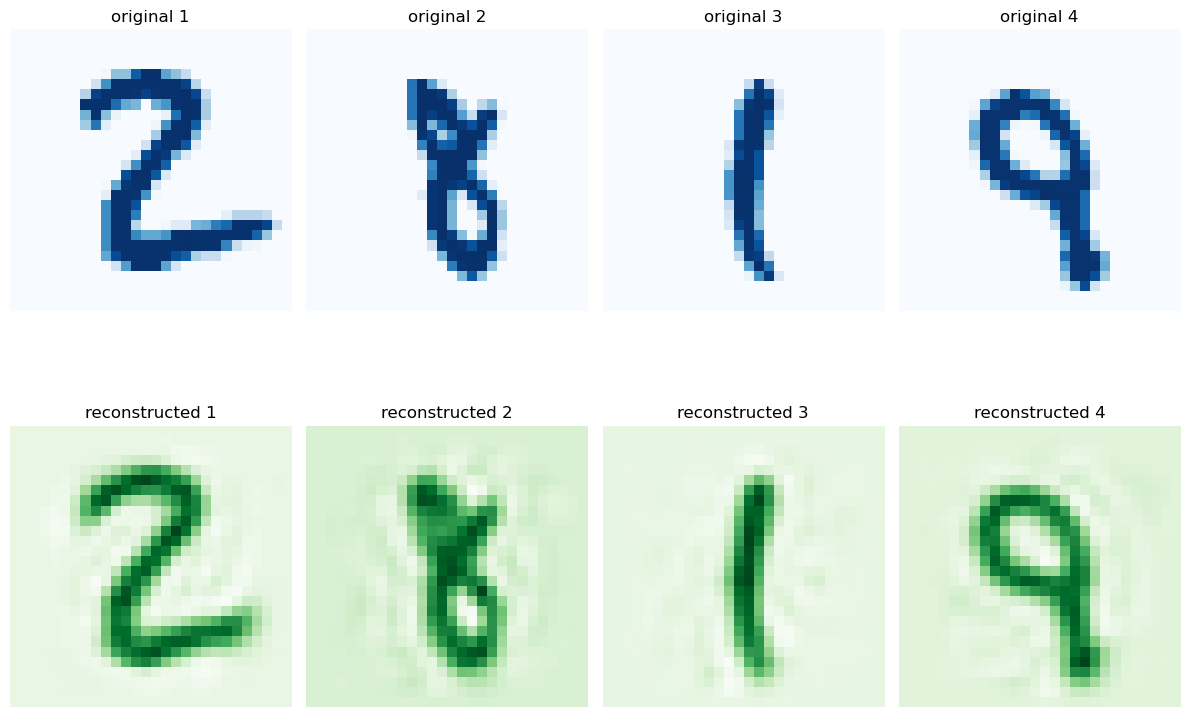

In [36]:
original_sample = test_images[1432:1436].reshape(-1,28,28)
constructed_sample = reconstructed_images[1432:1436].reshape(-1,28,28)
fig, axes = plt.subplots(2,4,figsize=(12, 9))
pictures_array = [original_sample,constructed_sample]
pictures_color = ['Blues','Greens']
pictures_title = ['original','reconstructed']
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(pictures_array[i][j], cmap=pictures_color[i])
        axes[i,j].set_title(pictures_title[i] + f' {j+1}')
        axes[i,j].axis('off')
plt.tight_layout()
plt.show()

<h5>D</h5>
<p>settin the axis=1 will calculate the mse for the elements in the 10000 pictures array</p>

In [37]:
def calculate_mse(input_images, output_images):
    input_images = np.array(input_images)
    output_images = np.array(output_images)
    
    return np.mean((input_images - output_images)**2,axis=1)

mse_array = calculate_mse(test_images,reconstructed_images)


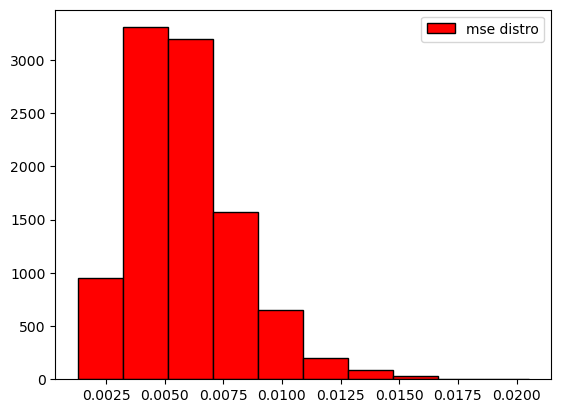

In [38]:
fig,ax = plt.subplots(1)
ax.hist(mse_array,label="mse distro",color= 'red',edgecolor="black")
ax.legend()
plt.show()

<h5>E</h5>

In [39]:
std = sps.tstd(mse_array) 
mean = np.mean(mse_array)
ks_statistic, p_value = sps.kstest(mse_array, cdf='norm', args=(mean, std))
p_value 

4.50671188626127e-43

<p>by the ablove result we reject that the mse random variable has normal distribution</p>

<hr>
<h3>Question 2</h3>

<h5>part 1)</h5>
<p>leverage points and outliers have significant impacts on linear regression. leverage points strongly influence the regression line's position, causing shifts or tilts. they lead to notable changes in estimated coefficients. outliers pull the regression line towards or away from them, affecting the overall direction. both leverage points and outliers can result in a model that fits well in certain areas but not very good in others, impacting prediction's accuracy. they make large residuals and may affect statistical tests and overall expectations. finding and handling these points are important for building accurate regression models.</p>

<h5>part 2)</h5>
<p>the coefficient of determination, or r ^ 2, is a useful tool in statistics to check how well a model predicts outcomes. it ranges from 0 to 1: 0 means the model isn't predicting anything, and 1 means it's predecting perfectly. if it's somewhere in between, like 0.3, it indicates a decent job explaining some of the differences in the data. to calculate this number, we must look at how much the model's predictions match the actual values compared to just guessing the average. we calculate it by taking the sum of the squared differences between our predicted values and the actual values and comparing that to the total sum of the squared differences between each data point and the mean of the dependent variable. this gives us the percentage of how well our model is explaining the variability in the dependent variable.</p>

<h5>part 3)</h5>
<p>the linear regression function is designed by the instructions of least square linear regression method. after that, we make lines using linespace and the slop and intercept of each test (the test numbers are corresponding to the order given in question) and then we plot each.</p>

In [40]:
x_value = [-2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5]
y_value = [-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5]
the_x_datas = [x_value, x_value + [5.8], x_value + [20.4], x_value + [20.4]]
the_y_datas = [y_value, y_value + [31.3], y_value + [14.1], y_value + [31.3]]

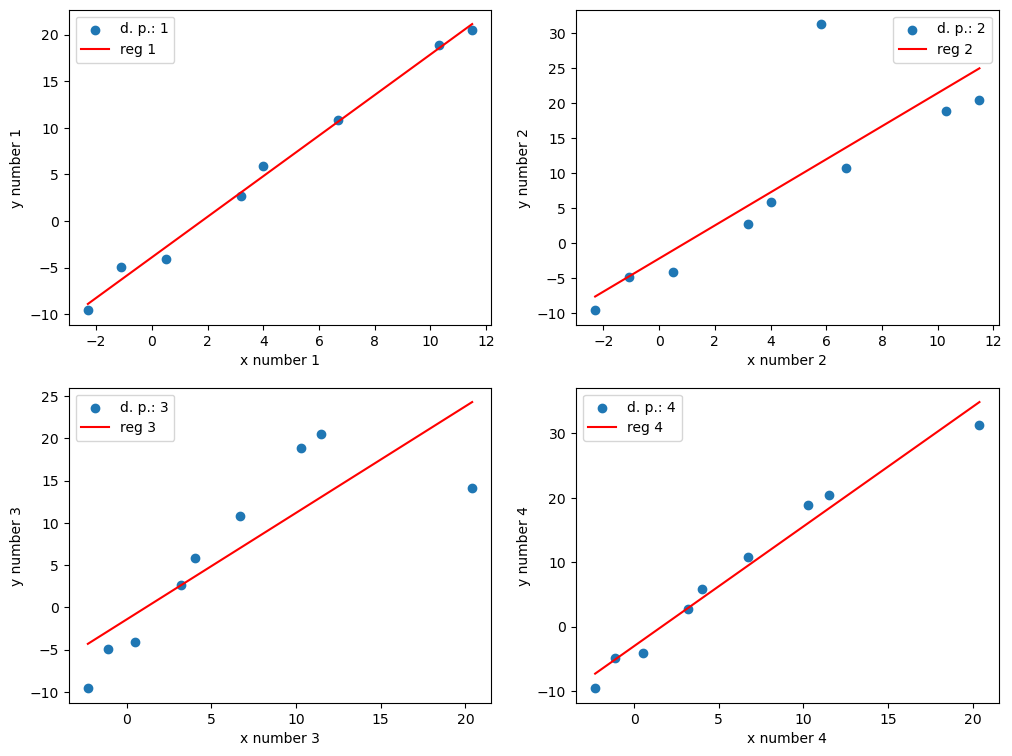

In [41]:
def calculate_linear_regression(x, y):
    n = len(x)

    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x_pow_2 = sum(xi**2 for xi in x)
    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_pow_2 - sum_x**2)
    c = (sum_y - m * sum_x) / n
    
    return m, c

m_values = []
c_values = []
for i in range(4):
    m,c = calculate_linear_regression(the_x_datas[i], the_y_datas[i])
    m_values.append(m)
    c_values.append(c)


fig , axs = plt.subplots(2,2,figsize = (12,9))

for i in range(2):
    for j in range(2):
        x_line = np.linspace(min(the_x_datas[2 * i + j]), max(the_x_datas[2 * i + j]), 100)
        y_line = m_values[2 * i + j] * x_line + c_values[2 * i + j]

        axs[i,j].scatter(the_x_datas[2 * i + j], the_y_datas[2 * i + j], label=f'd. p.: {2 * i + j + 1}')
        axs[i,j].plot(x_line, y_line, label=f'reg {2 * i + j + 1}', color='red')
        axs[i,j].set_xlabel(f'x number {2 * i + j + 1}')
        axs[i,j].set_ylabel(f'y number {2 * i + j + 1}')
        axs[i,j].legend()
plt.show()


<p>now we write a function that calculates R^2 and print the corresponding value for each test:</p>

In [42]:
def calculate_r_pow2(x, y, m, c):

    y_hat = [m * xi + c for xi in x]
    mean_y = sum(y) / len(y)

    s = sum((yi - y_hati)**2 for yi, y_hati in zip(y, y_hat))
    p = sum((yi - mean_y)**2 for yi in y)
    r_pow_2 = 1 - (s / p)
    
    return r_pow_2

for i in range(4):
    rr = calculate_r_pow2(the_x_datas[i],the_y_datas[i],m_values[i],c_values[i])
    print(f"this is the R^2 value for test number {i + 1}: {rr}")

this is the R^2 value for test number 1: 0.9931142293628097
this is the R^2 value for test number 2: 0.6943381680789323
this is the R^2 value for test number 3: 0.7069879724740986
this is the R^2 value for test number 4: 0.9738367949787371


<h5>part 4)</h5>
<p>to reduce error of our regression model when we have outliers and leverage points, it's better to use a method less sensitive to extreme values. an effective cure for outliers is to use techniques such as huber regression or theil-sen regression. these methods reduce the influence of outliers by putting less importance on data points deviating too much from the overall trend. additionally transformation techniques can lower the impact of leverage points. using regularization methods, like ridge regression, helps to prevent overfitting and to make more accurate model.</p>
<hr>

<h3>Question 3)</h3>

In [43]:
df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")

<h5>part 1)</h5>
<p>for na values we can drop the rows containing these values or we can replace them using the fillna method of pandas. i will fill the missing values with the average value of that column:</p>

In [44]:
needed_columns = ['pace','dribbling']
missing_rows = df[needed_columns].isnull()
missing_rows

,pace,dribbling
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
21556,False,False
21557,False,False
21558,True,True
21559,True,True


In [45]:
for x in needed_columns:
    df[x].fillna(df[x].mean(),inplace=True)
print(df['pace'].loc[missing_rows['pace']].head(3))
print(df['dribbling'].loc[missing_rows['dribbling']].head(3))

8     69.897002
17    69.897002
23    69.897002
Name: pace, dtype: float64
8     65.024872
17    65.024872
23    65.024872
Name: dribbling, dtype: float64


<h5>part 2)</h5>

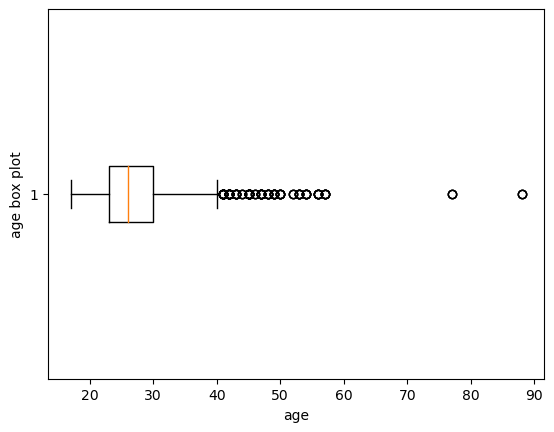

In [46]:
fig,ax = plt.subplots(1)
ax.boxplot(df['age'],vert=False)
plt.xlabel('age')
plt.ylabel('age box plot')
plt.show()

In [47]:
q1 = np.percentile(df['age'],25)
q2 = np.percentile(df['age'],50)
q3 = np.percentile(df['age'],75)
the_min = df["age"].min()
the_max = df["age"].max()
print(f"min: {the_min}, max: {the_max}, q1: {q1}, q2: {q2}, q3: {q3}")


min: 17, max: 88, q1: 23.0, q2: 26.0, q3: 30.0


<p>min and max are obvious. q1 to q3 are first, second and third quartiles, means 25, 50 and 75 percents of the players have less age than this quartile respectively.</p>

<h5>part 3)</h5>

<h5>section a</h5>

In [48]:
set_seed(810109203)
selected_samples = np.random.choice(df['weight'], size=100, replace=False)
variance = selected_samples.var()
the_std = selected_samples.std()
the_mean = selected_samples.mean()
print(f"variance: {variance}, std: {the_std}, mean: {the_mean}")

variance: 53.07, std: 7.284915922644544, mean: 76.7


<h5>section b</h5>
<p>a q-q plot, or quantile-quantile plot is used to find out if a dataset is following a particular distribution or not. it compares the quantiles of the observed data to the quantiles expected from the chosen distribution, helping to find the differnces between expected and the real distribution.</p>

<h5>section c</h5>

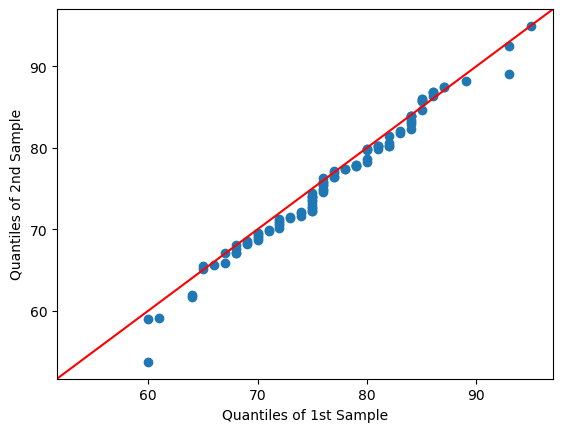

In [49]:
set_seed(810109203)
normal_sample = np.random.normal(76.7,7.28,size = 100)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

<p>based on the plot specifications it seems that this sample is close to normal distribution</p>

<h5>section d)</h5>

In [50]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

0.5503065586090088

<p>based on the p_value result it can be said that this sample is following the normal distribution with a great confidence level</p>

<h5>section e)</h5>

In [51]:
#n = 500
set_seed(810109203)
selected_samples = np.random.choice(df['weight'], size=500, replace=False)
variance = selected_samples.var()
the_std = selected_samples.std()
the_mean = selected_samples.mean()
print(f"variance: {variance}, std: {the_std}, mean: {the_mean}")

variance: 54.236, std: 7.364509488078618, mean: 76.0


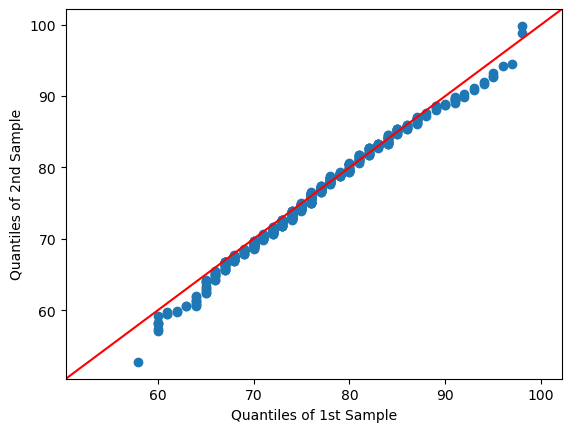

In [52]:
set_seed(810109203)
normal_sample = np.random.normal(76.0,7.36,size = 500)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

In [53]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

0.0013178142253309488

In [54]:
#n = 2000
set_seed(810109203)
selected_samples = np.random.choice(df['weight'], size=2000, replace=False)
variance = selected_samples.var()
the_std = selected_samples.std()
the_mean = selected_samples.mean()
print(f"variance: {variance}, std: {the_std}, mean: {the_mean}")

variance: 51.687695999999995, std: 7.189415553436872, mean: 75.548


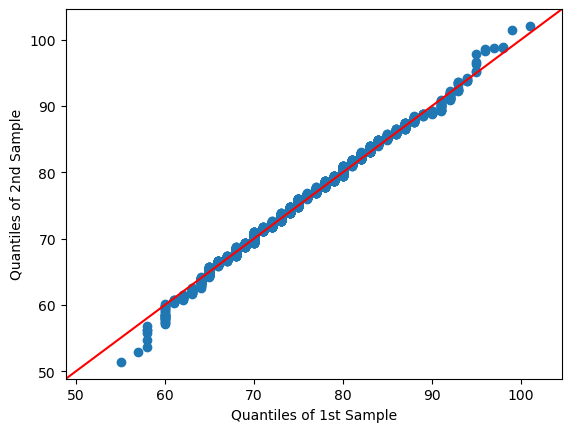

In [55]:
set_seed(810109203)
normal_sample = np.random.normal(75.548,7.18,size = 2000)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

In [56]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

2.6769496841438922e-08

<p>inspite the fact that q_q tables are showing perfect correspondence between these larger samples and normal distribution, shapiro test rejects our claim in both tests. but see the below line:</p>

In [57]:
statistic, p_value = sps.shapiro(normal_sample)
p_value

0.0321296788752079

<p>even the normal sample generated by numpy won't pass the significance (0.05) level! which is a bit confusing.</p>

<h5>part 4)</h5>

<h5>section a)</h5>

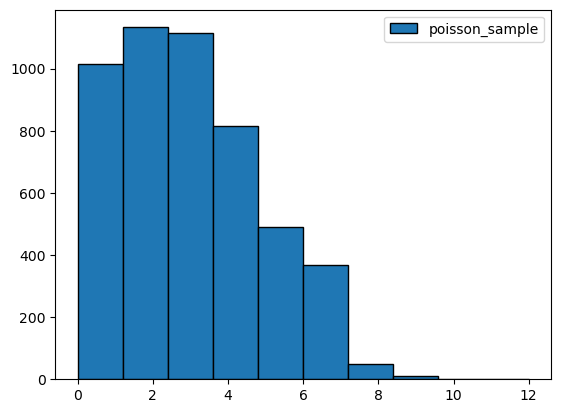

In [58]:
set_seed(810109203)
poisson_sample = np.random.poisson(3,5000)
fig,ax = plt.subplots()
ax.hist(poisson_sample,label='poisson_sample',edgecolor= 'black')
plt.legend()
plt.show()

<h5>section b)</h5>

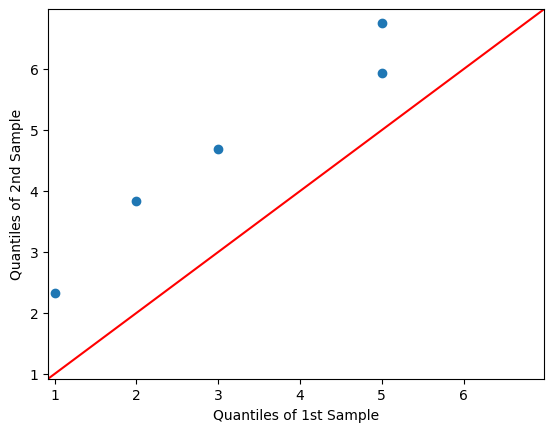

In [59]:
set_seed(810109203)
normal_sample = np.random.normal(3,math.sqrt(3),size = 5)
selected_samples = np.random.poisson(3,size = 5)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

In [60]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

0.3772224485874176

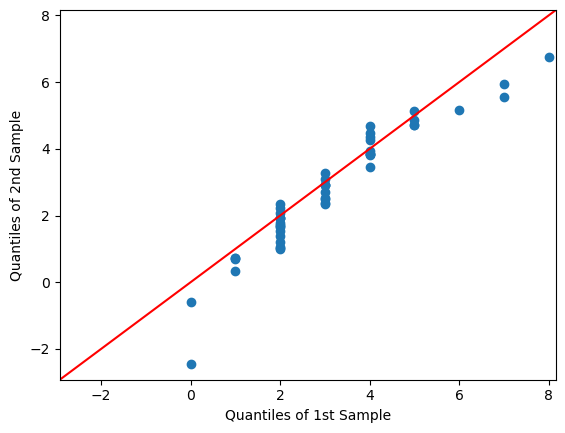

In [61]:
set_seed(810109203)
normal_sample = np.random.normal(3,math.sqrt(3),size = 50)
selected_samples = np.random.poisson(3,size = 50)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

In [62]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

0.0034155610483139753

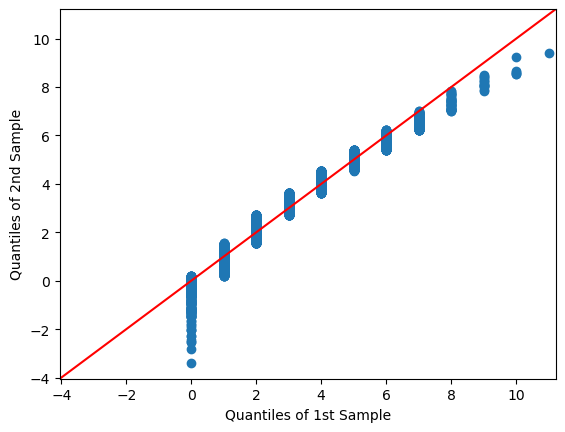

In [63]:
set_seed(810109203)
normal_sample = np.random.normal(3,math.sqrt(3),size = 5000)
selected_samples = np.random.poisson(3,size = 5000)
pp_x = sm.ProbPlot(selected_samples)
pp_y = sm.ProbPlot(normal_sample)
qqplot_2samples(pp_x, pp_y,line='45')
plt.show()

In [64]:
statistic, p_value = sps.shapiro(selected_samples)
p_value

3.499730302965052e-39

<p>as you can see in above tests, as much as the size grows, the shapiro test rejects more powerfull, and this is obviously against the clt theoreom. therefore and based on our former experiences with shapiro test, it can be concluded that this test isn't appropriate for recognising the normal distrubtion with large number of sample size duo to it's vast amount of error. it's better to use shapiro alongside with other goodness of fit tests.</p>